In [54]:
import numpy as np
import cv2
from skimage import io, color
from matplotlib import pyplot as plt
import math
from matplotlib.colors import LogNorm
from scipy.fftpack import *

In [55]:
def low_pass_filter(radius, image_shape):
    #Imagine patratica de zerouri
    filt = np.zeros((radius, radius))

    #Masca circulara alba pe imaginea creata
    for x in range(radius):
        for y in range(radius):
            if (radius//2 - x)**2 + (radius//2 - y)**2 < (radius//2)**2:
                filt[x][y] = 1

    #Afisare imagine creata cu masca
    print(filt.shape)
    plt.figure(), plt.title("Filtru trece-jos circular de raza = " + str(radius))
    plt.imshow(filt, cmap='gray')

    #Calcul dimensiuni pad pentru a adauga o bordura neagra imaginii create si a o aduce
    #la dimensiunile imaginii de filtrat
    aux1 = image_shape[0] - filt.shape[0]
    if(aux1 % 2 == 0):
        pad_rows = ((image_shape[0] - filt.shape[0])//2, (image_shape[0] - filt.shape[0])//2) 
    else:
        pad_rows = ((image_shape[0] - filt.shape[0])//2+1, (image_shape[0] - filt.shape[0])//2+1)

    aux2 = image_shape[1] - filt.shape[1]
    if(aux2 % 2 == 0):
        pad_cols = ((image_shape[1] - filt.shape[1])//2, (image_shape[1] - filt.shape[1])//2)
    else:
        pad_cols = ((image_shape[1] - filt.shape[1])//2+1, (image_shape[1] - filt.shape[1])//2+1)

    pad_shape = (pad_rows, pad_cols)

    #Aplicare pad
    filt = np.pad(filt, pad_shape, 'constant', constant_values=0)
    if(aux1 % 2 != 0 and aux2 % 2 != 0):
        filt = filt[0:filt.shape[0]-1, 0:filt.shape[1]-1]
    elif(aux1 % 2 != 0 and aux2 % 2 == 0):
        filt = filt[0:filt.shape[0]-1, 0:filt.shape[1]]
    elif(aux1 % 2 == 0 and aux2 % 2 != 0):
        filt = filt[0:filt.shape[0], 0:filt.shape[1]-1]

    #Afisare filtru pe dimensiunile imaginii de filtrat
    print(filt.shape)
    plt.figure(figsize = (10,10)), plt.title("Filtru trece-jos circular pe dimensiunile imaginii de filtrat")
    plt.imshow(filt, cmap='gray')

    return filt

In [56]:
def low_pass(img, radius):
    #Calcul transformata Fourier si shiftare
    img_fft = fftn(img)
    img_fft_shift = fftshift(img_fft)

    #Afisare spectru imagine
    plt.figure(figsize = (10,10)), plt.title("Spectrul imaginii originale")
    plt.imshow(np.abs(img_fft_shift), cmap='gray', norm=LogNorm(vmin=5))

    #Apelare functie de construire  filtrului
    filter_mask = low_pass_filter(radius, img.shape)

    #Aplicare filtru
    img_fft_shift_filtered = img_fft_shift * filter_mask

    #Afisare spectru dupa filtrare
    plt.figure(figsize = (10,10)), plt.title("Spectrul imaginii dupa filtrarea trece-jos")
    plt.imshow(np.abs(img_fft_shift_filtered), cmap='gray', norm=LogNorm(vmin=5))

    return ifftn(fftshift(img_fft_shift_filtered))

In [76]:
def bandstop(img, threshold=0.0001):
    img_fft = fftn(img)

    borders = [img_fft[0, 0], img_fft[0, img.shape[1]-1], img_fft[img.shape[0]-1, 0], img_fft[img.shape[0]-1, img.shape[1]-1]]

    borders = np.array(borders)
    max_value = np.max(borders)
    
    #Calcul prag
    T = threshold * np.abs(max_value)
    
    print("Max: ", np.max(img_fft))
    print("Min: ", np.min(img_fft))
    print("Threshold: ", T)
    img_fft_shifted = fftshift(img_fft)

    center_x = img_fft_shifted.shape[0]//2
    center_y = img_fft_shifted.shape[1]//2
    radius = img_fft_shifted.shape[0] // 6 
    
    #Aplicare filtru
    for x in range(img_fft_shifted.shape[0]):
        for y in range(img_fft_shifted.shape[1]):
            if (center_x - x)**2 + (center_y - y)**2 > (radius)**2 and np.abs(img_fft_shifted[x, y]) > T :
                img_fft_shifted[x, y] = 0
    
    #Afisare spectru dupa filtrare
    plt.figure(figsize = (10,10)), plt.title("Spectrul imaginii dupa filtrarea de banda")
    plt.imshow(np.abs(img_fft_shifted), cmap='gray', norm=LogNorm(vmin=5))

    return np.abs(ifftn(ifftshift(img_fft_shifted)))

(120, 120)
(540, 404)
Max:  (30268571-0j)
Min:  (-3492183.7885907763-1191729.564148202j)
Threshold:  3026.8571


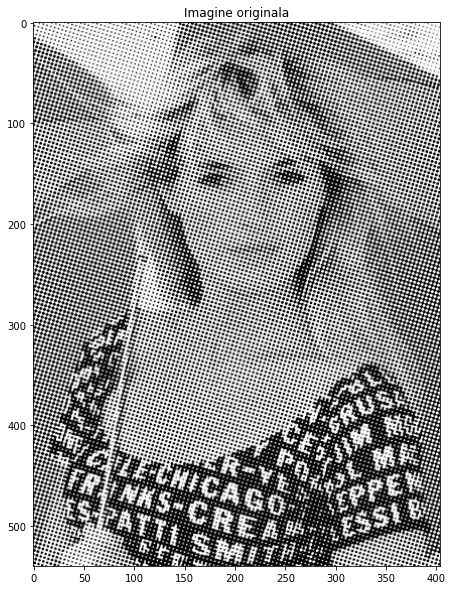

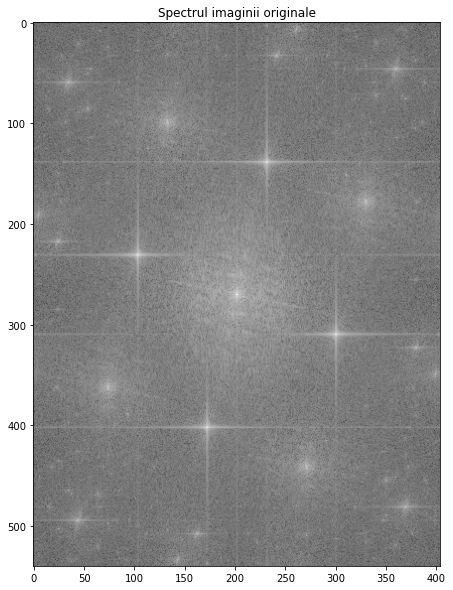

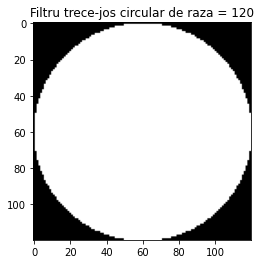

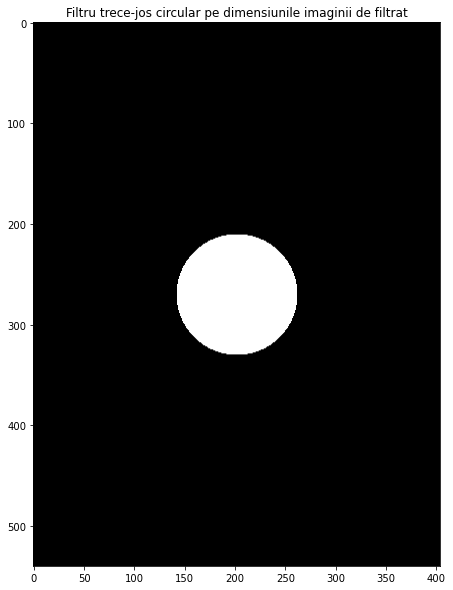

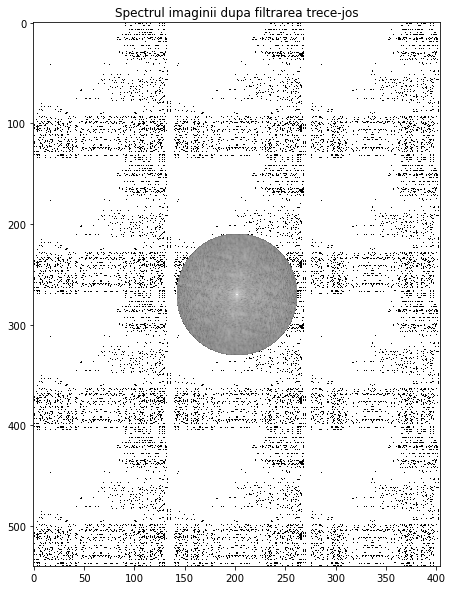

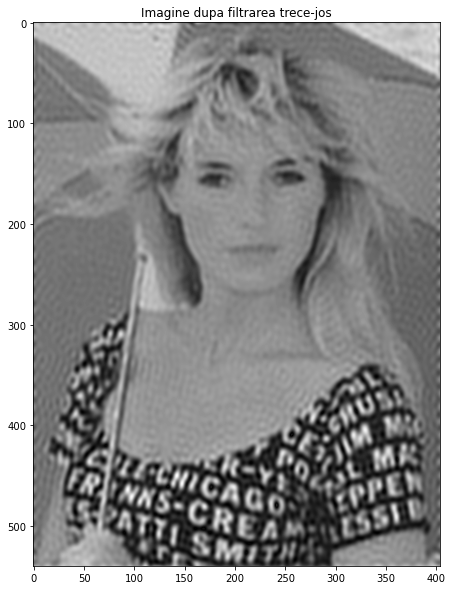

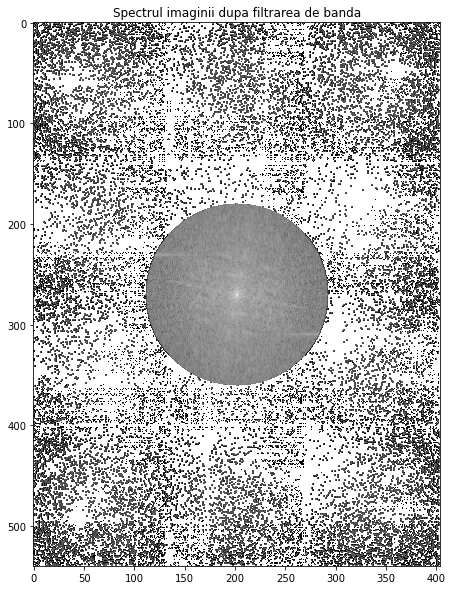

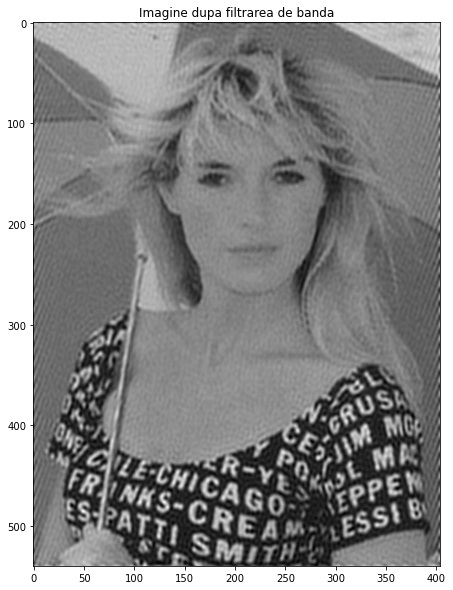

In [77]:
image1 = io.imread("gray1.jpg")
plt.figure(figsize = (10,10)), plt.title("Imagine originala")
plt.imshow(image1, cmap = 'gray')

image_lowpass = low_pass(image1, radius = 120)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea trece-jos")
plt.imshow(np.abs(image_lowpass), cmap='gray')

image_bandstop = bandstop(image1)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea de banda")
plt.imshow(np.abs(image_bandstop), cmap='gray')

(170, 170)
(815, 573)
Max:  (214861.72526705882-5.968558980384842e-13j)
Min:  (-7111.1133067228075-692.4746370824047j)
Threshold:  21.486172526705882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(815, 573, 3)


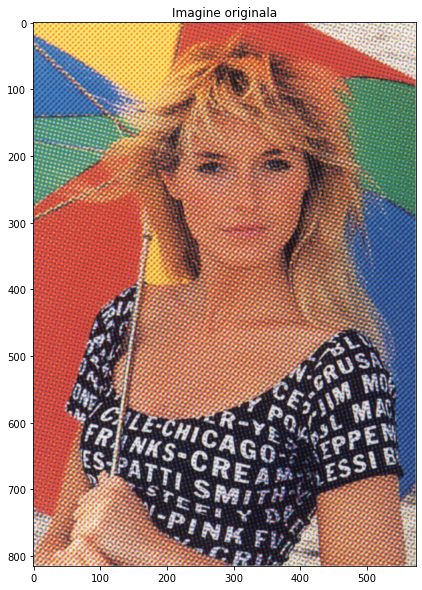

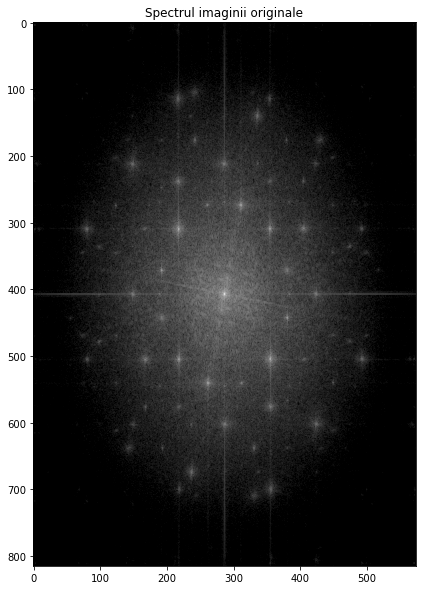

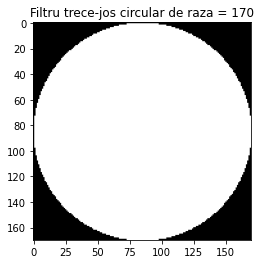

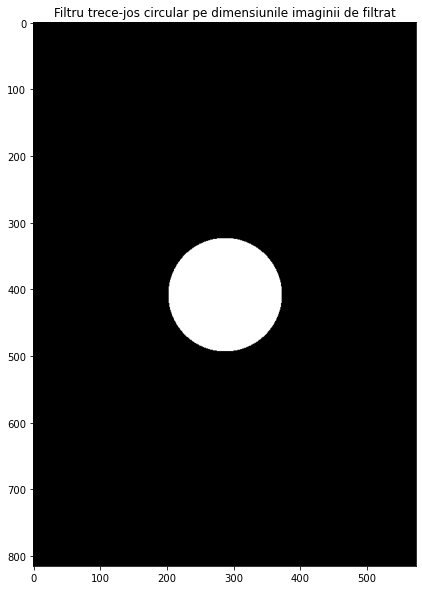

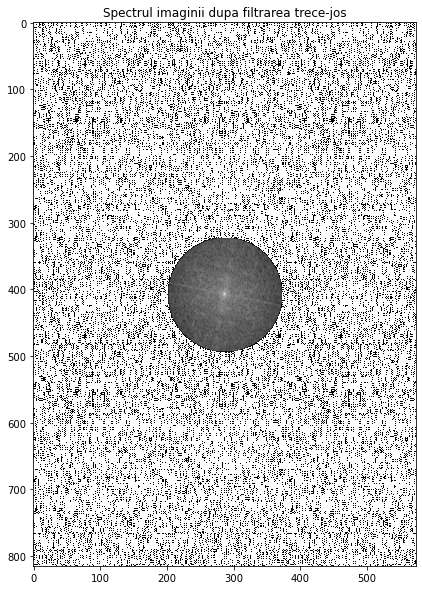

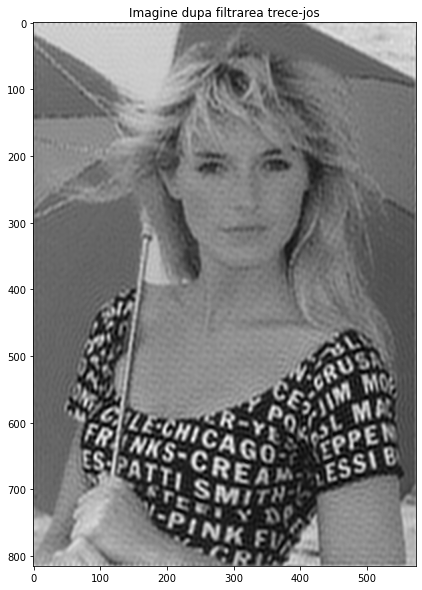

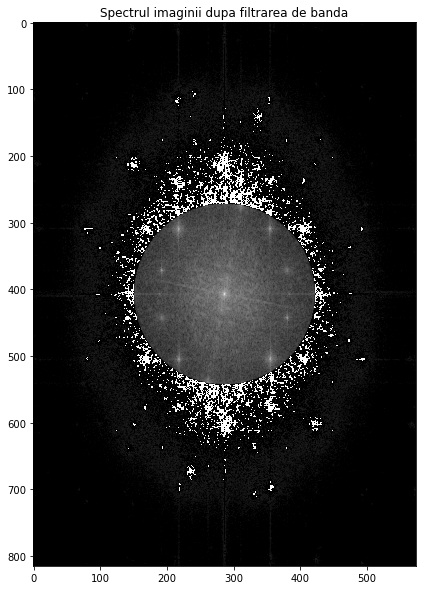

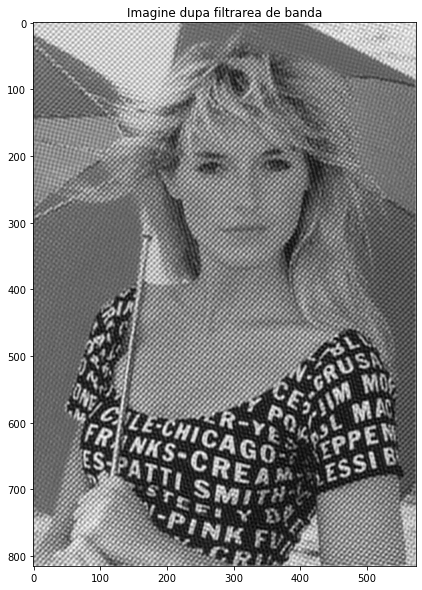

In [79]:
image2 = io.imread("FalseMoire.jpg")
plt.figure(figsize = (10,10)), plt.title("Imagine originala")
plt.imshow(image2)
image2 = color.rgb2gray(image2)

image_lowpass = low_pass(image2, radius = 170)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea trece-jos")
plt.imshow(np.abs(image_lowpass), cmap='gray')

image_bandstop = bandstop(image2)
image_bandstop = color.gray2rgb(image_bandstop)
print(image_bandstop.shape)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea de banda")
plt.imshow(np.abs(image_bandstop))

(360, 360)
(1362, 1845)
Max:  (1357918.0826439215-1.424780293746153e-10j)
Min:  (-66071.26048326328-87785.04806640507j)
Threshold:  135.79180826439216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1362, 1845, 3)


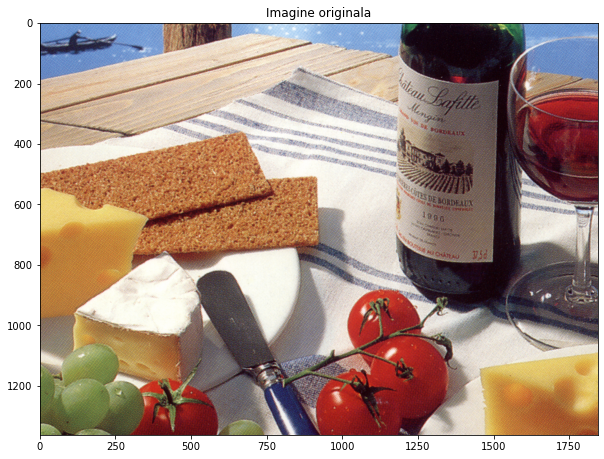

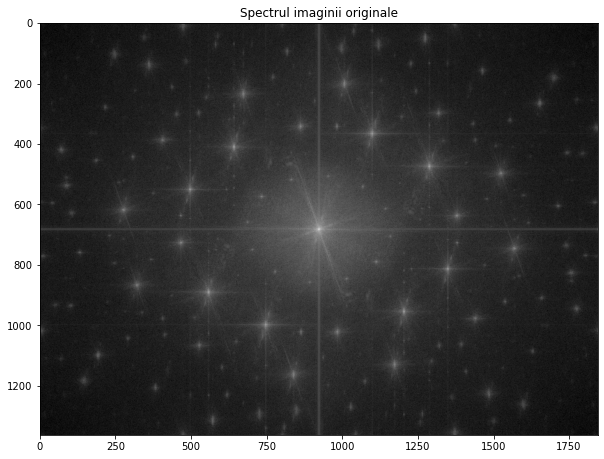

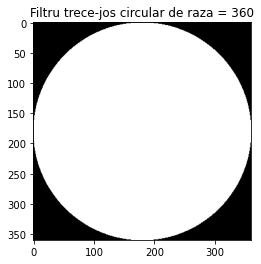

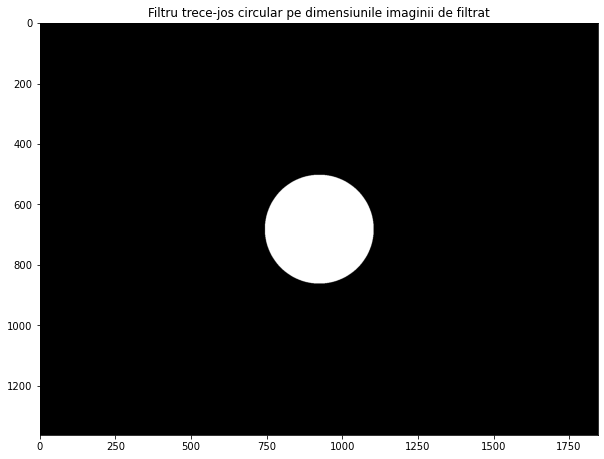

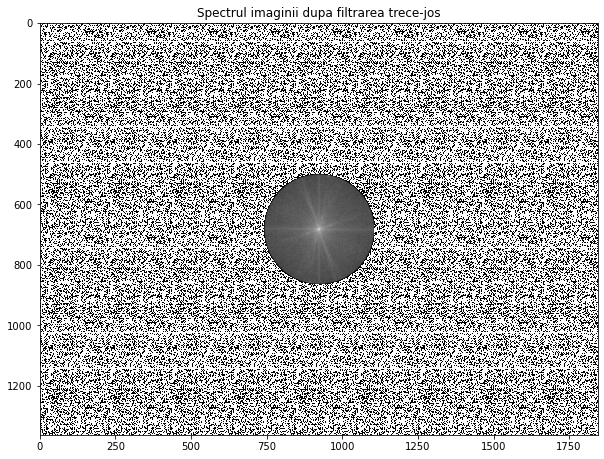

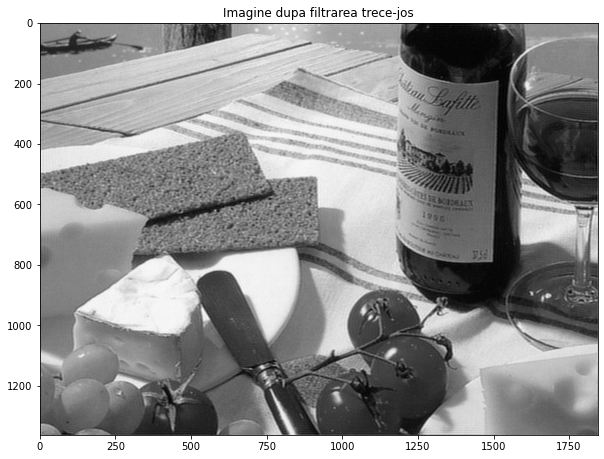

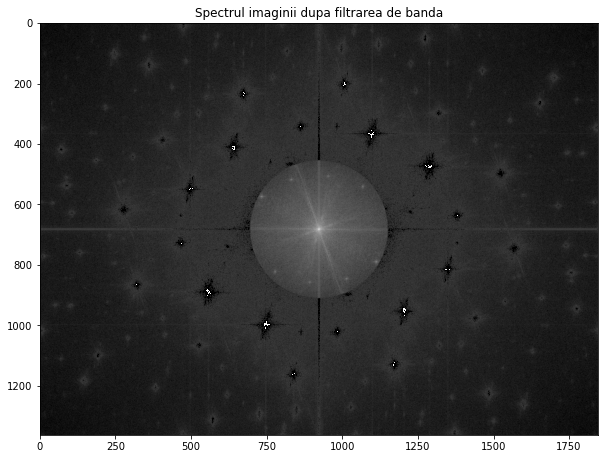

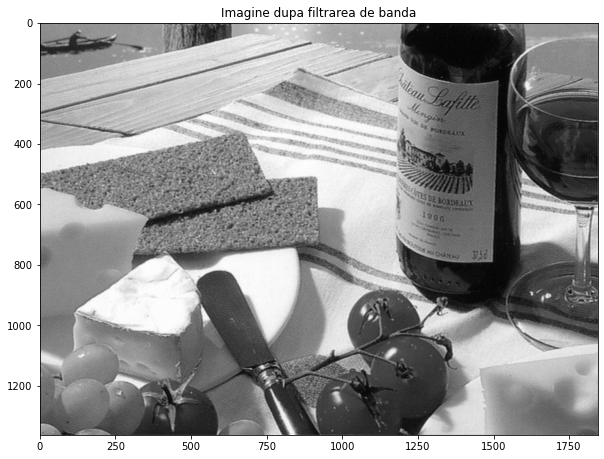

In [81]:
image3 = io.imread("Finland.jpg")
plt.figure(figsize = (10,10)), plt.title("Imagine originala")
plt.imshow(image3)
image3 = color.rgb2gray(image3)

image_lowpass = low_pass(image3, radius = 360)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea trece-jos")
plt.imshow(np.abs(image_lowpass), cmap='gray')

image_bandstop = bandstop(image3)
image_bandstop = color.gray2rgb(image_bandstop)
print(image_bandstop.shape)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea de banda")
plt.imshow(np.abs(image_bandstop))

(120, 120)
(839, 1227)
Max:  (552302.3321733334-2.3362645151792094e-11j)
Min:  (-31117.40658313098-17095.652940276443j)
Threshold:  55.23023321733334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(839, 1227, 3)


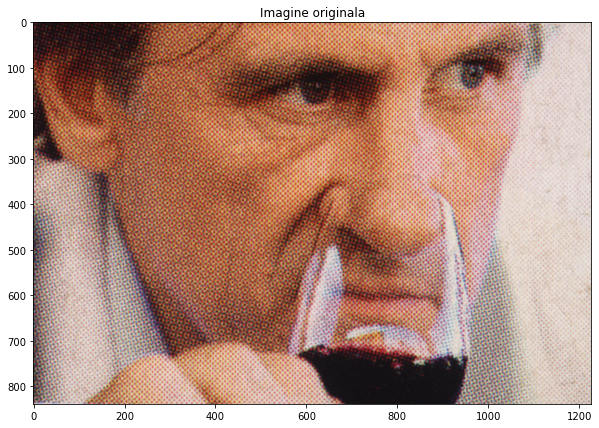

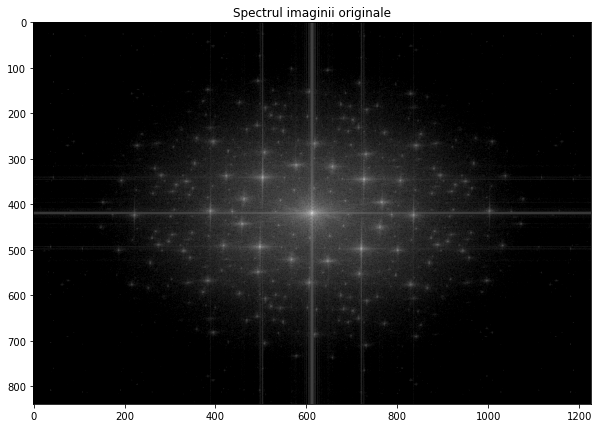

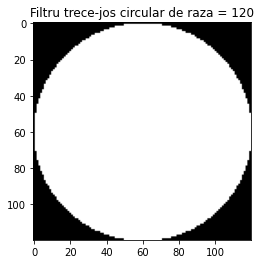

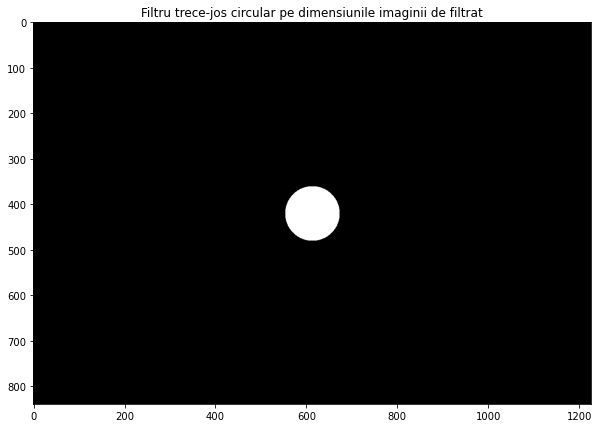

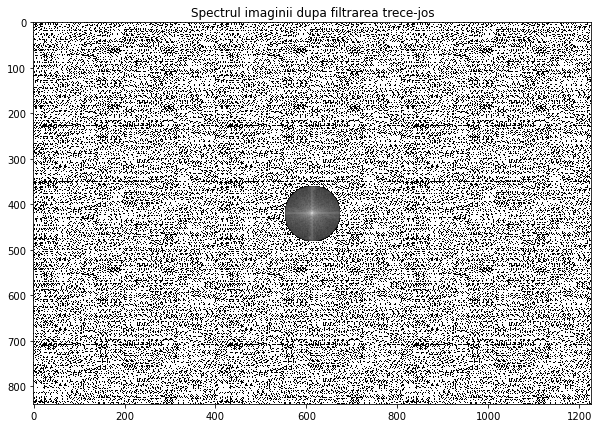

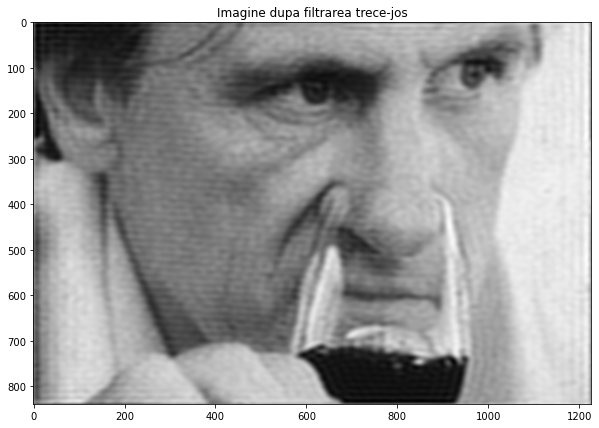

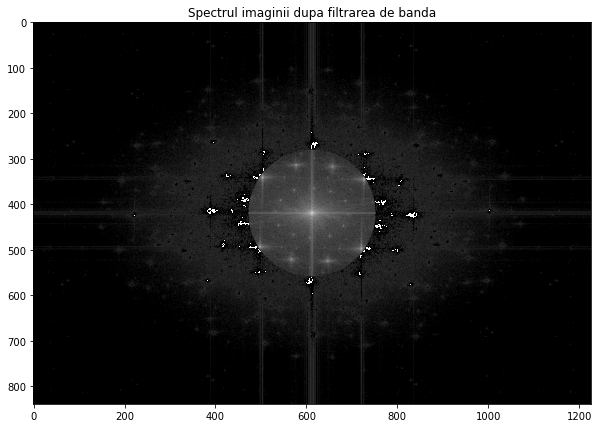

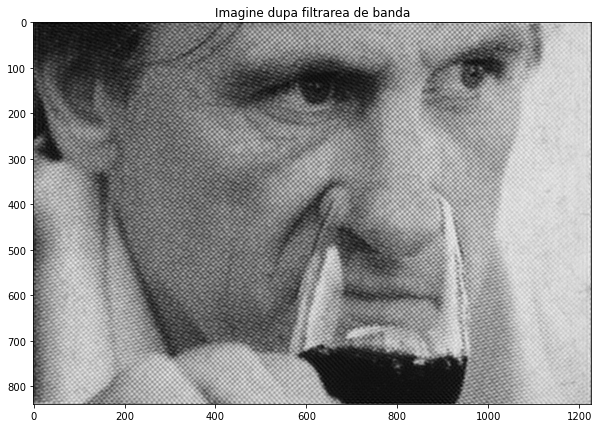

In [84]:
image4 = io.imread("Gerard.jpg")
plt.figure(figsize = (10,10)), plt.title("Imagine originala")
plt.imshow(image4)
image4 = color.rgb2gray(image4)

image_lowpass = low_pass(image4, radius = 120)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea trece-jos")
plt.imshow(np.abs(image_lowpass), cmap='gray')

image_bandstop = bandstop(image4)
image_bandstop = color.gray2rgb(image_bandstop)
print(image_bandstop.shape)
plt.figure(figsize = (10,10)), plt.title("Imagine dupa filtrarea de banda")
plt.imshow(np.abs(image_bandstop))